<a href="https://colab.research.google.com/github/JustinShawResearch/Neural-Network-from-Scratch/blob/main/Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST NN from scratch
(using numpy. no PyTorch/TensorFlow/Keras)

In this notebook, I have implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

This notebook takes heavy inspiration from this [video](https://www.youtube.com/watch?v=w8yWXqWQYmU&t=41s). Thank you Samson Zhang!


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 01. Theory on paper

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3345.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3347.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3348.jpg?raw=true" width=2000/>
</div>




Now we will look into **forward propagation**

> Note: Without the non linear activation function, our Neural Netwotrk would just be a fancy way of doing linear regression.

See [here](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) for a table of activation functions


<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3349.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3350.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3353.jpg?raw=true" width=2000/>
</div>


Now we will look into **back propagation**
(learning/optimizing the weights and biases)


<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3354.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3356.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3357.jpg?raw=true" width=2000/>
</div>

<div align="center">
<img src="https://github.com/JustinShawResearch/Neural-Network-from-Scratch/blob/main/images/IMG_3358.jpg?raw=true" width=2000/>
</div>



## 02. Coding it up

In [6]:
# moving the data from df to np array.
data = np.array(df)
np.random.shuffle(data)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [6, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [7]:
m,n = data.shape
print(f'Rows: {m}, Columns: {n}')


Rows: 42000, Columns: 785


In [8]:
# spliting data from 42000 -> 1000:41000 for test:train split.
data_test = data[0:1000].T
y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test / 255
x_test.shape

(784, 1000)

In [16]:
data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255
x_train.shape

(784, 41000)

In [13]:
def init_params(): # we don't need params for this function as we are creating them from scratch
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def deriv_ReLU(Z):
  return Z > 0

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Creates the correct sized matrix
  one_hot_Y[np.arange(Y.size), Y] = 1 # Sets the correct values to 1
  one_hot_Y = one_hot_Y.T # we flip from each row is an example to each column is an example
  return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2



In [18]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params() # recall: the initialized params are completly random as we are ajusting them.
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 50 == 0):
      print(f"Iteration: {i}")
      print(f"Accuracy: {get_accuracy(get_predictions(A2) , Y)}")
  return W1, b1, W2, b2

In [19]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration: 0
[4 4 4 ... 5 5 8] [4 4 6 ... 6 5 9]
Accuracy: 0.09939024390243903
Iteration: 50
[2 9 2 ... 3 3 4] [4 4 6 ... 6 5 9]
Accuracy: 0.42878048780487804
Iteration: 100
[2 4 2 ... 2 3 7] [4 4 6 ... 6 5 9]
Accuracy: 0.583390243902439
Iteration: 150
[4 4 2 ... 2 3 7] [4 4 6 ... 6 5 9]
Accuracy: 0.6834634146341464
Iteration: 200
[4 4 2 ... 2 3 9] [4 4 6 ... 6 5 9]
Accuracy: 0.7364146341463415
Iteration: 250
[4 4 6 ... 2 3 9] [4 4 6 ... 6 5 9]
Accuracy: 0.7690243902439025
Iteration: 300
[4 4 6 ... 2 3 9] [4 4 6 ... 6 5 9]
Accuracy: 0.7920243902439025
Iteration: 350
[4 4 6 ... 2 8 9] [4 4 6 ... 6 5 9]
Accuracy: 0.808829268292683
Iteration: 400
[4 4 6 ... 2 8 9] [4 4 6 ... 6 5 9]
Accuracy: 0.8217560975609756
Iteration: 450
[4 4 6 ... 2 8 9] [4 4 6 ... 6 5 9]
Accuracy: 0.8323170731707317


In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


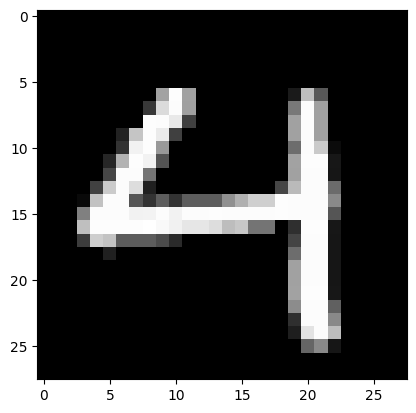

Prediction:  [4]
Label:  4


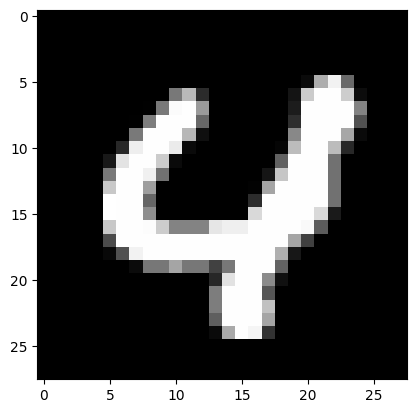

Prediction:  [6]
Label:  6


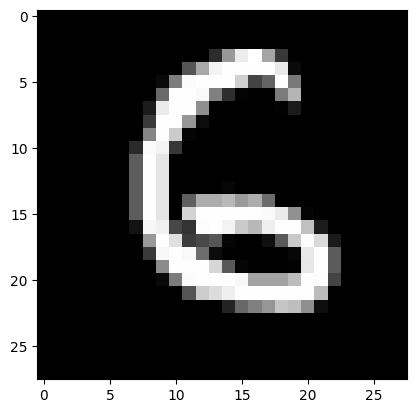

Prediction:  [9]
Label:  9


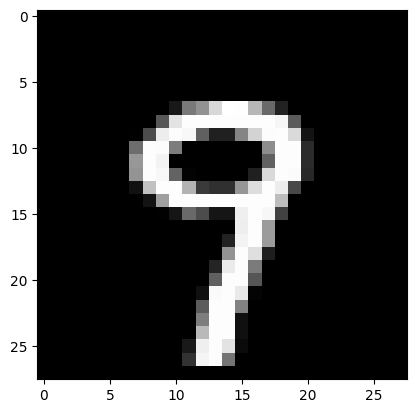

In [21]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)